# Caso Creit One - EDA

## Descripción del Set de Datos por Analizar.

Credit One ha visto un aumento en el número de clientes que han incumplido los préstamos que han obtenido de varios socios, y Credit One, como su servicio de calificación crediticia, podría arriesgarse a perder negocios si el problema no se resuelve correctamente lejos. Han solicitado la ayuda de nuestro equipo de ciencia de datos para diseñar e implementar una solución creativa y empíricamente sólida. 

♦ Problema:

  1) Aumento de las tasas de incumplimiento de los clientes: esto es malo para Credit One, ya que aprobamos los préstamos de los      clientes en primer lugar.
  2) Ingresos y pérdida de clientes para clientes y, eventualmente, pérdida de clientes para Credit One 

♦ Preguntas de investigación:

   ¿Cómo se asegura de que los clientes puedan pagar sus préstamos?
   ¿Podemos hacer esto?


### Descripción de las variables que conforman el set de datos.

Esta investigación empleó una variable binaria, pago predeterminado (Sí = 1, No = 0), como la variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:
X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito al consumidor individual como el crédito de su familia (suplementario).
X2: Género (1 = masculino; 2 = femenino).
X3: Educación (1 = escuela de posgrado; 2 = universidad; 3 = escuela secundaria; 4 = otras).
X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
X5: Edad (año).
X6 - X11: Historial de pagos pasados. Rastreamos los últimos registros de pagos mensuales (de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de reembolso en agosto de 2005; . . . X11 = el estado de reembolso en abril de 2005. La escala de medición para el estado de reembolso es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . . 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
X12-X17: Cantidad de extracto de cuenta (dólar NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . . X17 = cantidad de extracto de cuenta en abril de 2005.
X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .; X23 = monto pagado en abril de 2005.


### Importación de la Librería Pandas.

Esta primera linea realiza la importación de la librería pandas, utilizada para realizar la carga del set de datos.

Una vez importada la libreria se realiza una prueba a efectos de obtener la versión de la librería que se cargó en el entorno, además, funciona como elemento para verificar que la misma se cargó correctamente.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, set_option
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
from pickle import dump
from pickle import load


### Carga del set de datos mediante Pandas (read_csv)
Se realiza la carga del archivo SCV, en este caso el mismo esta almacenado dentro del 
proyecto para poder cargarlo en el entorno.

In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPayment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Se Inicia con el EDA.

#### ♦ Obtención de Información sobre cada una de las variables

Con la siguiente linea de código, se obtiene la información de cada una de las columnas que conforman el set de datos, los datos que arroja esta línea son: cantidad de registros, presencia de nulos, tipo de dato.

Como principal resultado de lo obtenido en esta linea, es la confirmación que no existen campos nulos y que todas las variables son datos numericos.

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null 

#### ♦ Se agrupan los datos mediante la variable Default Payment Next Mont

Del agrupamiento de los datos se evidencia que 23 364 personas no son clientes confiables, mientras que evidencia que 6 636 personas podrían ser confiables.

Para lo anterior, se continua respetando el valor binario de la variable Pago por defecto, donde 1 = Si, y 0 = No.

In [4]:
grupoPagoDefault = credit.groupby('defaultPayment')['defaultPayment'].count()
print (grupoPagoDefault)

defaultPayment
0    23364
1     6636
Name: defaultPayment, dtype: int64


### Estadísticas descriptivas del set de datos.

En primera instancia es importante considerar que el set de datos tiene un campo ID, el cual no aporta valor al momento de generar las estadísticas descriptivas, la sentencia "iloc" permite seleccionar las variables a partir del campo 1, y no el 0, y hasta el final. Lo anterior genera como resultado un nuevo set de datos donde no se considera el campo ID.

#### ◘ Obtención de las estadísticas descriptivas

1) Se contabilizan 30 mil registros en total del set de datos.

2) El limite de credito oscila entre 10 mill y 1 millón de dólares, con una media de 167 484 dólares.

3) EL 50% de los casos tienen un crédito por 140 mil dólares.

4) Las edades de los clientes oscilan entre los 21 y 79 años, con una media de 35 años.

5) Se registran pagos negativos en todos los rubros.

In [5]:
dataFrame = credit.iloc[:,1:]
dataFrame.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPayment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Una vez visualizada las estadísticas descripctivas, se procede a realizar la consulta sobre el nombre de las variables que conforman el set de datos en este momento.

In [6]:
header = dataFrame.dtypes.index 
print (header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaultPayment'],
      dtype='object')


#### Creación de Histogramas para diferentes variables.

En este momento se procede a crear histogramas para las variables nominales como  Education, Age y tambien sobre el limite de crédito; esto para conocer la distribución del set de datos según cada dato.

##### ◘ Histograma - Limite de Crédito

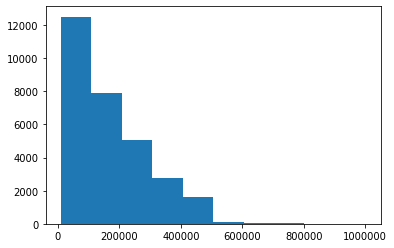

In [7]:
plt.hist (dataFrame ['LIMIT_BAL']) 
plt.show ()

En concordancia con lo antes expuesto (referente a los limites de crédito) el histograma permite evidenciar que la mayor parte de los creditos esta concentrado entre 0 y 100.000 dolares, asimismo, se denota la existencia de almenos un crédito de $1 millon.

##### ◘ Histograma por Grado Académico 

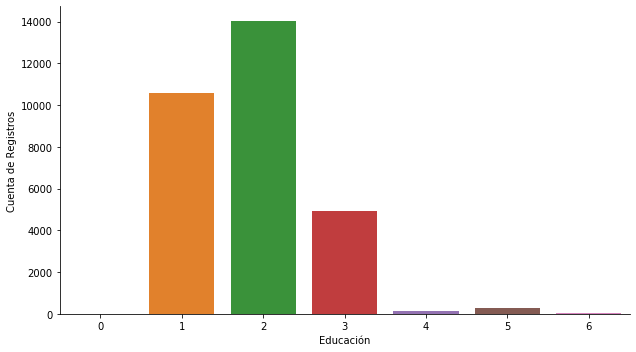

In [8]:


fg = sns.catplot('EDUCATION', data=dataFrame, kind='count', aspect=1.75)
fg.set_xlabels('Educación')
fg.set_ylabels('Cuenta de Registros')



Ahora, bien, si se realiza un análisis por escolaridad de los clientes se determina que las personas que registran un grado Universitario son los que han solicitado mayor cantidad de créditos, seguidos por los clientes con una escolaridad de Posgrado y escuela secundaria.

Así mismo, es importante mencionar que la población con algún grado de escolaridad inferior a los antes mencionados, o incluso aquellos usuarios que no disponen de preparación académica, son los clientes que menos créditos tienen.

##### ◘ Distribución por Edad del Cliente

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


Text(0.5, 1.0, 'Distribución de Edades')

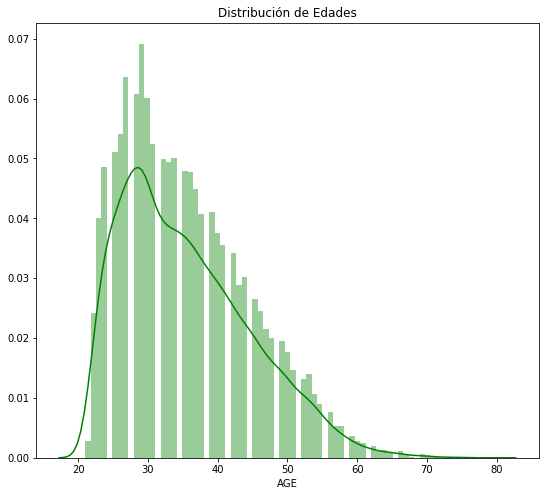

In [9]:
print(dataFrame.AGE.describe())
plt.figure(figsize=(9, 8))
age_dist = sns.distplot(dataFrame.AGE, color='g', bins=75, hist_kws={'alpha': 0.4});
age_dist.set_title("Distribución de Edades")

Como es de esperar la mayoría de los créditos otorgados estan asociados a personas con edades laboralmente productivas. En ese sentido los clientes que registran un mayor monto de deuda son las personas con edades entre los 30 y 40 años y los que menos créditos tienen son aquellas personas con más de 60 años.

##### ◘ Distribución de Clientes según genero.

En el siguiente grafico se puede apreciar que actualmente la maoria de los clientes son mujeres, siendo que este grupo representa el 58% de los registros, dejando el restante 42% de los creditos a los hombres.

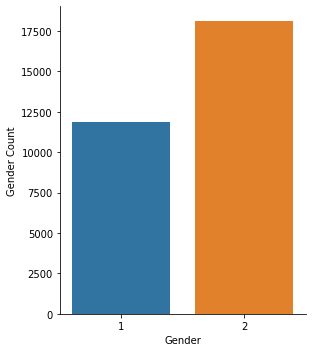

In [10]:
fg = sns.catplot('SEX', data=dataFrame, kind='count', aspect=.85)
fg.set_xlabels('Gender')
fg.set_ylabels('Gender Count')

#### Grafica lineal para analizar el comportamiento de los pagos.

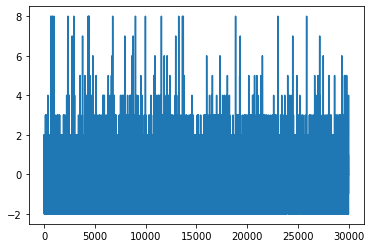

In [11]:
plt.plot (dataFrame ['PAY_0'], label = "Pago 0") 
plt.show ()

Como se puede apreciar se visualiza un "comportamiento" del pago 0, en este rubro, al igual que las variablos pay 1,2,3,4,5 y 6 registran pagos de montos inferiores a 0.

### Análisis univariable de los atributos que conforman el set de datos

Una vez que se han realizado algunas visualizaciones de diferentes variables consideradas como atributos nominales y que permite visualizar algunos elementos relacionados con los clientes, se procede a realizar una visualización de todas las variables, a efectos de poder identificar los comportamientos que se consignaron para cada domino de dato.

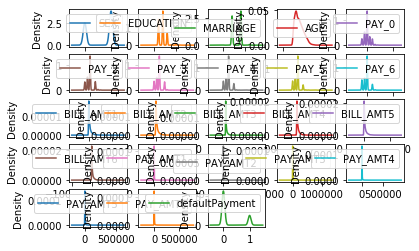

In [12]:
dfdp = dataFrame.iloc[:,1:]
dfdp.plot(kind='density', subplots=True, layout=(5,5), sharex=False)
plt.show()

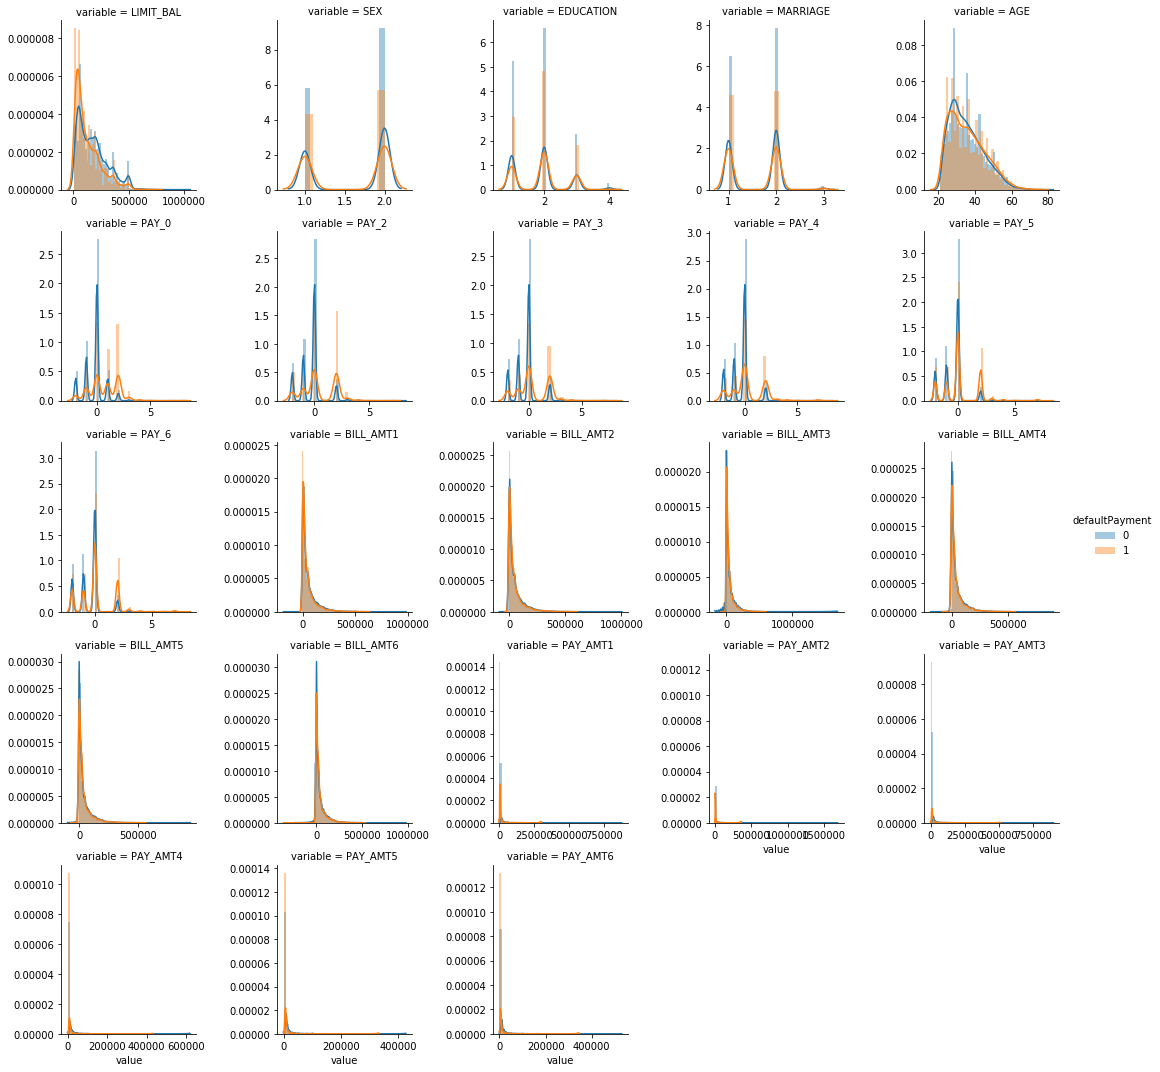

In [43]:
output = 'defaultPayment'

cols = [ f for f in dataFrame.columns if dataFrame.dtypes[ f ] != "object"]
cols.remove( output )

f = pd.melt( dataFrame, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

## Se inicia con un proceso de limpieza de los datos

Una vez que se conoce los alcances del set de datos se procede a realizar la limpieza de las observaciones, para luego proceder a generar la matriz de correlaciones y por último poder diseñar los modelos predictivos.

### Limpieza datos sobre formación academica

Según la descripción de las variables (al inicio de este Notebook) la fomración académica se categoriza en los siguientes sub conjuntos.

 X3: Educación (1 = escuela de posgrado; 2 = universidad; 3 = escuela secundaria; 4 = otras)
 
Como se puede apreciar la data está entre 1 y 4, sin embargo, al momento de listar los datos se identifican valores que no están dentro de las categorías antes listadas.


In [8]:
cat_edu = dataFrame.groupby('EDUCATION').size()
print(cat_edu)
print('\n')

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
dtype: int64




Ahora que hemos observado la distribución de datos dentro de la variable Educación, se procederá a transformar los datos de manera tal que estos coincidan con las categorías antes descritras.

Para lo anterior realizaremos un remplazo de valores a efectos de poder incluir todos estos datos en las categorías pre establecidas y no perder observaciones.

En este caso, ante el desconocimiento de lo que representa las categorías 0, 5 y 6 las mismas serán agrupadas en la categoría 4.

In [9]:
# esta línea se utiliza para remplazar los valores, en este caso, para agrupar las categorias 0,5 y 6 en la 4
dataFrame.EDUCATION.replace({0 : 4, 5: 4, 6: 4}, inplace=True)

# se vuelven a listar las categorías
cat_edu = dataFrame.groupby('EDUCATION').size()
print(cat_edu)

EDUCATION
1    10585
2    14030
3     4917
4      468
dtype: int64


C:\Users\jgzun\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Limpieza de datos para la variable de estado civil.

Al igual, que con la variable de educación, el estado civil esta categorizado de la siguiente manera:

X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).



In [10]:
cat_estCivil = dataFrame.groupby('MARRIAGE').size()
print(cat_estCivil)
print('\n')


MARRIAGE
0       54
1    13659
2    15964
3      323
dtype: int64




Ahora identificando que existen datos que están en la categoría 0, y ante el desconocimiento de lo que contiene esa categoría, se procede a agruparlos con la categoría 3

In [11]:
dataFrame.MARRIAGE.replace({0 : 3}, inplace=True)

cat_estCivil = dataFrame.groupby('MARRIAGE').size()
print(cat_estCivil)

MARRIAGE
1    13659
2    15964
3      377
dtype: int64


### Grafica de Correlaciones

Una vez que analizamos una serie de distribuciones sobre los datos, procedemos a graficar las correlaciones existentes entre las variables, siendo que la variable dependiente es defaultPayment, los resultados son los siguientes:

Ahora que conocemos el comportamiento de todas las variables que conforman el set de datos, podemos proceder a análizar las correlaciones existentes entre cada una de estas, a efectos poder generar una selección de las variables necesarias a efectos de poder realizar una eventual predicción.

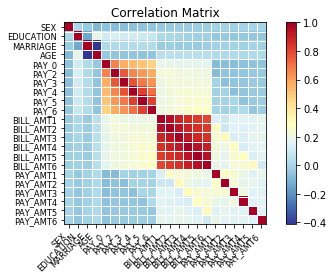

In [12]:
# Pairwise Pearson correlations
dfpp = dataFrame.iloc[:,1:]
corr = dfpp.set_index('defaultPayment').corr(method='pearson')
# print(corr)

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

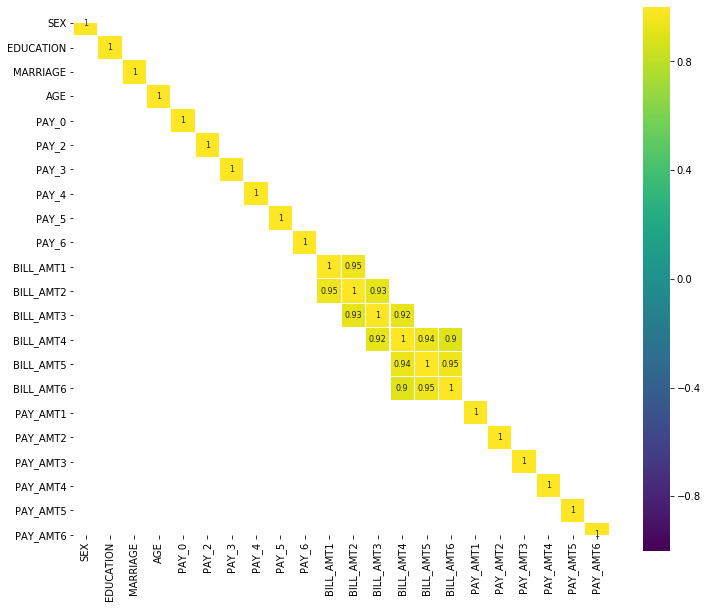

In [13]:
df = dataFrame.iloc[:,1:]
corr = df.drop('defaultPayment', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [14]:
dfkw = dataFrame.iloc[:,1:]
skew = dfkw.skew()
print(skew)

SEX               -0.424183
EDUCATION          0.489720
MARRIAGE           0.036154
AGE                0.732246
PAY_0              0.731975
PAY_2              0.790565
PAY_3              0.840682
PAY_4              0.999629
PAY_5              1.008197
PAY_6              0.948029
BILL_AMT1          2.663861
BILL_AMT2          2.705221
BILL_AMT3          3.087830
BILL_AMT4          2.821965
BILL_AMT5          2.876380
BILL_AMT6          2.846645
PAY_AMT1          14.668364
PAY_AMT2          30.453817
PAY_AMT3          17.216635
PAY_AMT4          12.904985
PAY_AMT5          11.127417
PAY_AMT6          10.640727
defaultPayment     1.343504
dtype: float64


Del gráfico y el listado anterior, se logra visualizar la existencia de correlaciones entre las variables Bill Atm (n) y Pay (n), en este caso para eventuales ejercicios de predicción se podrían suprimir las mismas.

En otro order de ideas se crea una matriz de covarianza para medir cómo los cambios en una variable están asociados con los cambios en una segunda variable

In [15]:
covMat = dataFrame.iloc[:,1:]
cov = covMat.cov()
print(cov)

                        SEX   EDUCATION     MARRIAGE           AGE  \
SEX                0.239247    0.004962    -0.007274     -0.409726   
EDUCATION          0.004962    0.554272    -0.053102      1.251988   
MARRIAGE          -0.007274   -0.053102     0.271863     -1.980186   
AGE               -0.409726    1.251988    -1.980186     84.969755   
PAY_0             -0.031685    0.094202     0.010873     -0.408639   
PAY_2             -0.041442    0.115604     0.014744     -0.553408   
PAY_3             -0.038694    0.109088     0.020218     -0.585263   
PAY_4             -0.034411    0.101430     0.019404     -0.535851   
PAY_5             -0.030521    0.087814     0.020312     -0.562245   
PAY_6             -0.024754    0.076186     0.019888     -0.517022   
BILL_AMT1      -1211.694332  909.885257 -1068.602920  38172.933546   
BILL_AMT2      -1085.595467  634.798683  -938.679611  35613.657962   
BILL_AMT3       -833.207432  346.636738 -1051.586918  34334.251320   
BILL_AMT4       -688

Se procede a exlcuir del set de datos todas aquellas variables que registran una correlacion superior al 0.9, lo anterior para evitar "ruido" al momento de trabajar con modelos predictivos.

Una vez efectuado esto, se procede a generar nuevamente la matriz de correlación para verificar la existencia de correlaciones altas.

In [16]:
df = dataFrame.drop(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'], axis=1)
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPayment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,19131,2000,36681,10000,9000,689,679,0


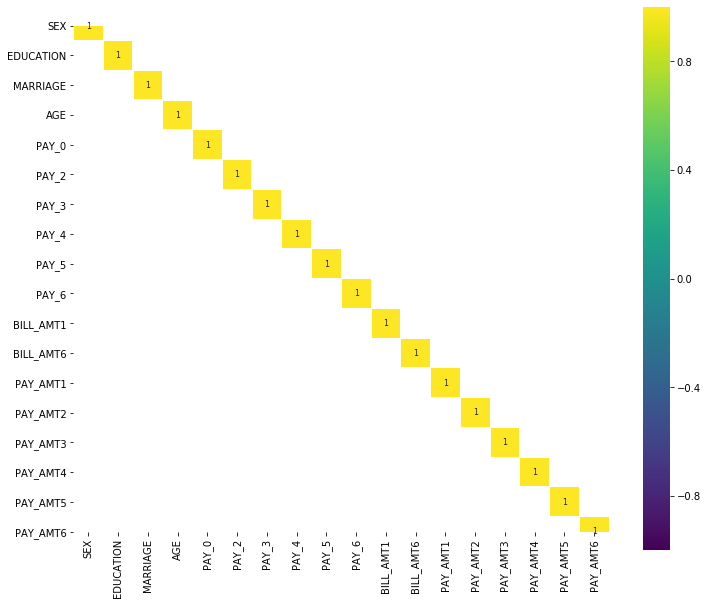

In [17]:
df = df.iloc[:,1:]
corr = df.drop('defaultPayment', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Limpiados los datos se procede a crear un archivo CSV, para almacenar los datos transformados.

In [18]:
df.to_csv('.\\CreditOneAjustada.csv')

## Preparación de modelos para predicciones

Se procede a establecer algunos parametros de forma predeterminadas, esto para la adecuada utilización de los modelos de clasificación.

In [19]:
%matplotlib inline

set_option('display.width', 100)
set_option('precision', 3)

pylab.rcParams['figure.figsize'] = (10.0, 8.0)# Con esta línea se establece el tamaño de las graficas

seed = 7 # se establece la semilla en 7
test_size = 0.20 # se define el tamaño del set de pruebas al 20% del total de las observaciones.
num_folds = 10
n_splits = 10

### División del set de datos en sub sets de entrenamiento y pruebas

Se efectúa la división de los datos en set de entrenamiento y set de pruebas, esto para proceder a implementar los modelos predictivos.

Primero realizamos una visualización de las variables que contiene el data frame, una vez, se realizó el proceso de transformación de los datos, esto para poder identificar las variables dependientes.

In [20]:
print('Resumen de la muestra de caracteristicas (Registros, Variables):', df.shape)
df.head(5)


Resumen de la muestra de caracteristicas (Registros, Variables): (30000, 19)


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPayment
0,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,2682,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,29239,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,46990,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,8617,19131,2000,36681,10000,9000,689,679,0


Ahora que tenemos el resumen del set de datos trabajado, procedemos a dividir las variables predictoras y la dependiete, siendo que se toma como variable dependiente "PAY_AMT6", el restante de variables son predictoras.

In [21]:
array = df.values
X = array[:,0:17]
Y = array[:,18]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [23]:
# Model train
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Model test
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 79.68%


Realizado la división del set de datos, se determina que la congianza de esta divición en datos de prueba y entrenamiento es del 79%.

Ahora se aplicará otro procedimiento para obtener la desviació de los datos, esto suponiendo que una distribución gaussiana de rendimiento (una suposición muy razonable) y registrando la media y la desviación estándar.

In [25]:
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 78.36%, Standard Deviation: (1.39%)


### Definición de modelos a estudiar

Una vez analizados las probavilidades de exactitud y confianza del set de datos, se procede a definir tres algoritmos para su respectiva comparación:

#### Algoritmos 

 k-Nearest Neighbors.

 Classification and Regression Trees.

 Support Vector Machines.

In [26]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [27]:
results1 = []
names1 = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results1.append(cv_results)
    names1.append(name)
    msg = "%s -> accuracy: (%3f), Standard Deviation: (%3f)" % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

KNN -> accuracy: (76.404167), Standard Deviation: (0.968434)
CART -> accuracy: (72.579167), Standard Deviation: (1.225942)
SVM -> accuracy: (77.716667), Standard Deviation: (0.878722)
LDA -> accuracy: (81.175000), Standard Deviation: (1.132659)


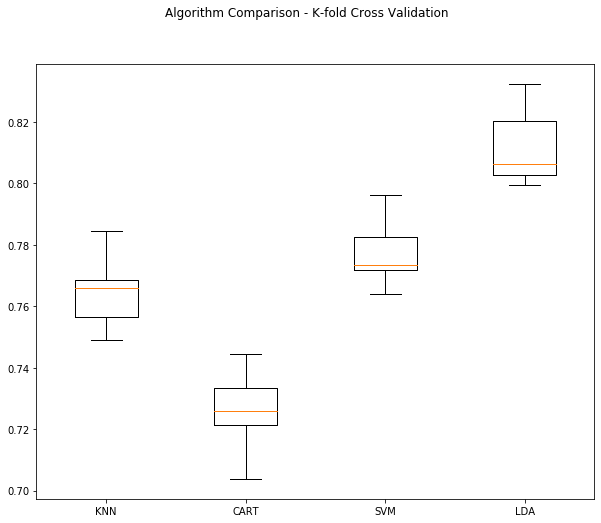

In [29]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison - K-fold Cross Validation')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

Como se puede apreciar de los 4 algoritmos el que registra mejor rendimiento es Linear Discriminant Analysis, siendo que este modelo será el seleccionado

In [28]:
kfoldTs = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
modelTs = LinearDiscriminantAnalysis()

In [29]:
scoring = 'accuracy'
resultsTs = cross_val_score(modelTs, X_train, Y_train, cv=kfoldTs, scoring=scoring)

print("Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (resultsTs.mean()*100.0, resultsTs.std()*100.0))

Accuracy: 81.22%, Standard Deviation: (0.61%)


In [30]:
modelTs.fit(X_train, Y_train)

result = modelTs.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 81.15%


In [31]:
predictions = modelTs.predict(X_test)
Y_test

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8115
[[4547  163]
 [ 968  322]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4710
           1       0.66      0.25      0.36      1290

    accuracy                           0.81      6000
   macro avg       0.74      0.61      0.63      6000
weighted avg       0.79      0.81      0.78      6000



In [34]:
df.to_csv('.\\CreditOnePredictores.csv')

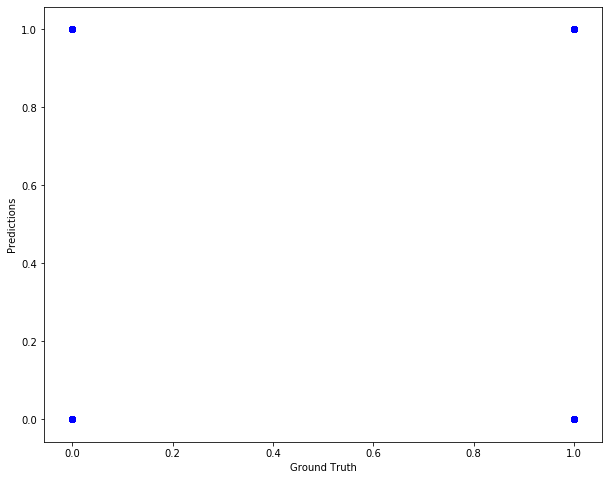

In [39]:
plt.scatter(Y_test, predictions, c='blue',alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();